# <img src="https://m.media-amazon.com/images/W/MEDIAX_792452-T2/images/I/81vOF2Rr2tS.jpg" width="60" />  
# **Prediction of Close Cotation of Bitcoin** 
### First Step : Load The Data 
We Load the Data Base from the API wich contains 1 day inteval cotation of Bitcoin 


In [38]:
from crypto_module import *

- Use the API

In [39]:
symbol = 'BTC/USD'
interval = '1day'
start_date = '2022-01-01 00:00:00'
end_date = '2022-12-31 00:00:00'

In [40]:
data = load_data(symbol, start_date, end_date, interval)
data

,datetime,open,high,low,close
0,2022-01-01,46211.19922,47963.28906,46211.19922,47735.12891
1,2022-01-02,47730.00000,47966.16016,46695.33984,47305.01172
2,2022-01-03,47304.21875,47578.96094,45716.50000,46439.19141
3,2022-01-04,46459.57031,47517.35156,45550.98828,45815.32812
4,2022-01-05,45811.16016,47054.82812,42500.00000,43437.66016
...,...,...,...,...,...
360,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047
361,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039
362,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922
363,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977


- We can verifie if the Data Set is clean

In [41]:
data.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
dtype: int64

- There are no Nan Values, load_data() works
- We can verifie if the type of element of the close colone is float to plot it properly

In [42]:
data['close']

0      47735.12891
1      47305.01172
2      46439.19141
3      45815.32812
4      43437.66016
          ...     
360    16697.98047
361    16538.40039
362    16631.19922
363    16602.00977
364    16528.02930
Name: close, Length: 365, dtype: float64

### We can visualize the Data
- We can code two functions for visualizing the Close price and the candels which represent the outcome of the market on the considered interval

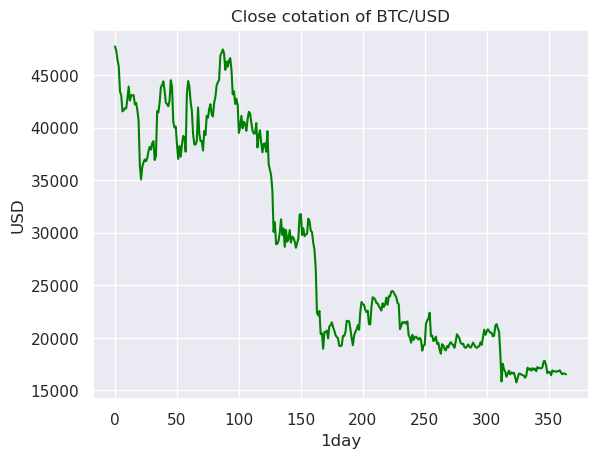

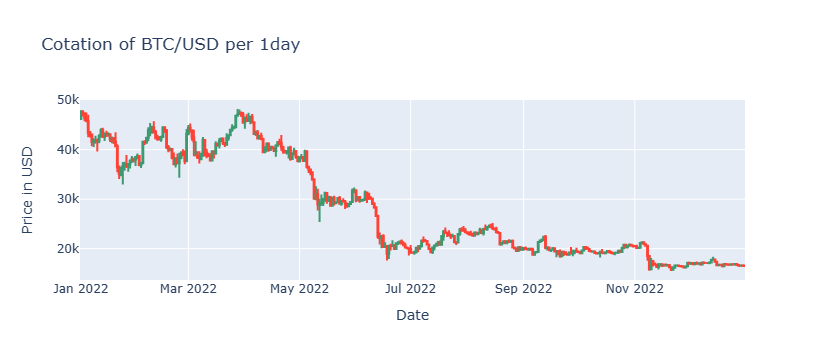

In [43]:
visualize_data(data, symbol, interval)
finance_visualize(data, symbol, interval)

### The Next step is to enrich the Database by adding indicators
- Indicators used are The Relative Strength Index (RSI), The Exponential Moving Average (EMA) and The Average True Range (ATR) 
    - The RSI measures the speed and change of price movements (momentum)
    - The EMA is a movig average that gives more weight to recent price, it seems to be relevent for predicting (trend)
    - The ATR quantifies the volatility (volaltility)

- Those indicators are computed over the 14 last days
  

In [44]:
final_data = add_indicators(data)
final_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,42581.64844,43462.78906,41766.66016,43090.78125,35.568008,43772.612563,2049.218750
1,2022-01-15,43089.08984,43809.28125,42579.42969,43087.21094,35.548190,43681.225680,1990.692522
2,2022-01-16,43098.19922,43492.07812,42610.44922,43099.76172,35.683860,43603.697152,1911.473692
3,2022-01-17,43104.35156,43199.91016,41568.76172,42216.80078,30.775756,43418.777635,1891.450460
4,2022-01-18,42218.01172,42682.64844,41288.87891,42369.82031,32.508293,43278.916659,1855.901822
...,...,...,...,...,...,...,...,...
347,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047,44.769321,16866.858029,369.682940
348,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039,42.154285,16823.063677,365.152714
349,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922,44.195619,16797.481750,351.276850
350,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977,43.673548,16771.418819,346.564273


### We can visualize the indicators 

#### EMA Indicator : 

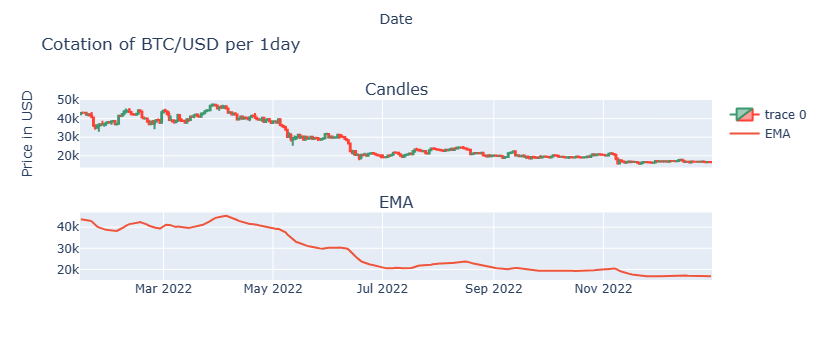

In [45]:
indicator = 'EMA'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### RSI Indicator :

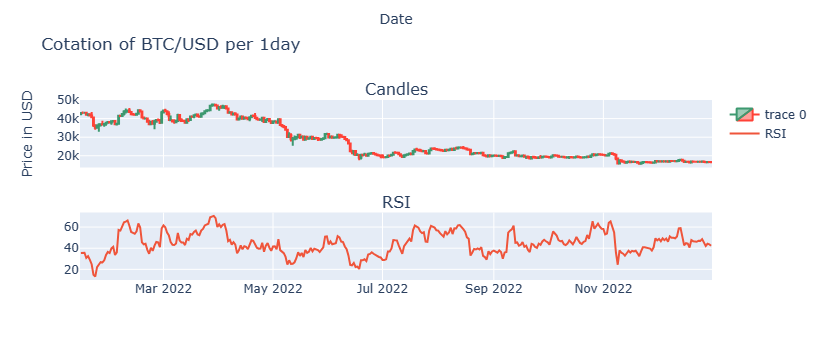

In [46]:
indicator = 'RSI'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### ATR Indicator : 

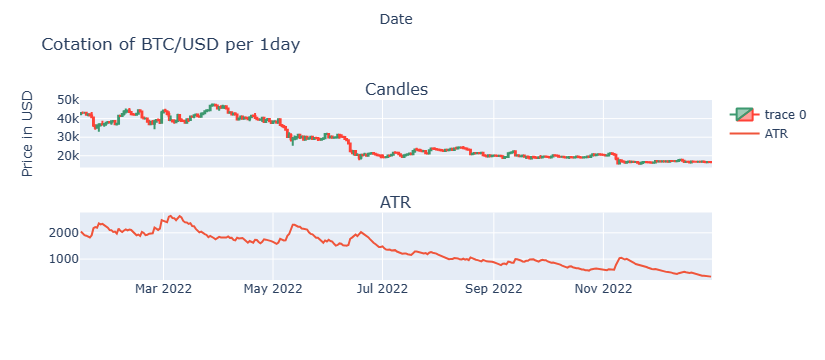

In [47]:
indicator = 'ATR'
visualize_with_indicator(final_data, symbol, interval, indicator)

# Prediction Model
#### First of all we have to scale the data for the models
- We recall that we want to predict the close price of Bitcoin

In [48]:
scaled_data = scaling_data(final_data)
scaled_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,0.846117,0.851405,0.834075,0.862553,0.390664,0.945616,0.742401
1,2022-01-15,0.862123,0.862250,0.859884,0.862440,0.390319,0.942433,0.717078
2,2022-01-16,0.862410,0.852322,0.860869,0.862836,0.392680,0.939733,0.682802
3,2022-01-17,0.862604,0.843177,0.827791,0.834970,0.307264,0.933293,0.674138
4,2022-01-18,0.834648,0.826986,0.818903,0.839800,0.337416,0.928423,0.658757
...,...,...,...,...,...,...,...,...
347,2022-12-27,0.036616,0.021966,0.035019,0.029610,0.550794,0.008590,0.015697
348,2022-12-28,0.029701,0.016013,0.030708,0.024574,0.505285,0.007065,0.013737
349,2022-12-29,0.024657,0.012236,0.031176,0.027503,0.540810,0.006174,0.007733
350,2022-12-30,0.027595,0.011758,0.027057,0.026582,0.531725,0.005266,0.005694


## First Model : Linear Regression

- We use linear regression to predict the the considered prediction time, in the following example we predict the price 60 days later 


In [49]:
prediction_time = 60 # We want to predict the close price 60 days Later 
regressor = ['close'] # We choose One regressor which is the colse price itself
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

- We apply the simple linear regression and we obtain the following prediction 

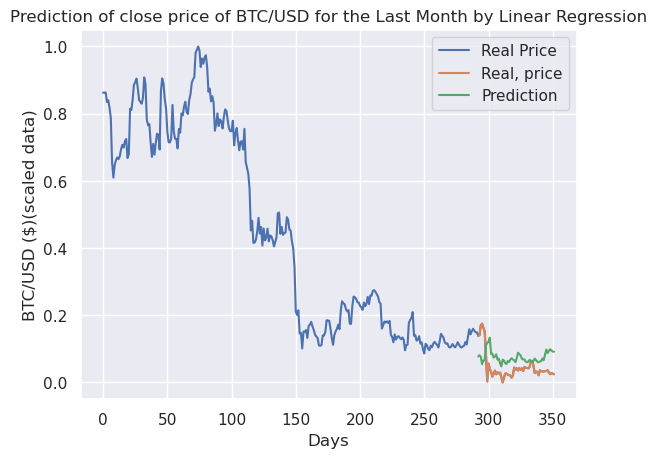

In [50]:

regression_matrix, future_price, simple_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

visualize_model(regression_matrix, scaled_data)

- We can zoom the see the prediction better 

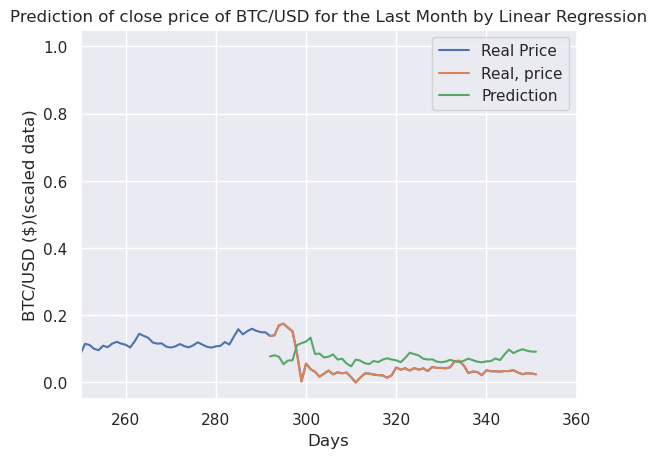

In [51]:
visualize_model(regression_matrix, scaled_data, zoom = [250, 360])

- We have compute the $R^{2}$ indicator to judge the relevance of the model

In [53]:
simple_r2

0.5301132142754481

- The $R^{2}$ shows that the linear regression is not that much adapted for time series like the close price 
- We can see in the plot that the simple linear regression cannot predict abrupt movement of the price, which is expected 
#### For the next step we can visualize the prediction of the next 60 days, which correspond to the first two months of 2023

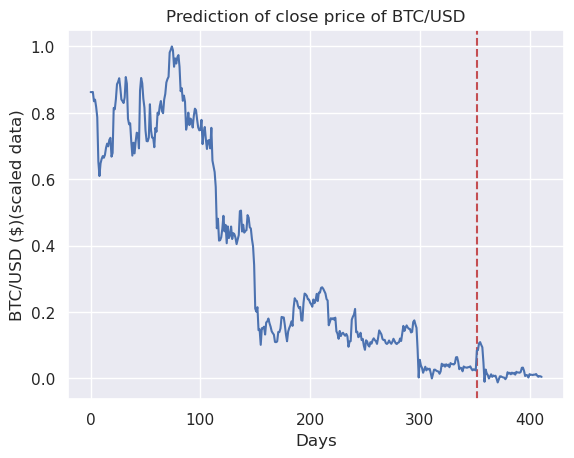

In [54]:
visualize_future(scaled_data, future_price)

#### We can also try the multiple linear regression
#### First of all, we analyse de Correlation Matrix to see the correlation between variables

<function matplotlib.pyplot.show(close=None, block=None)>

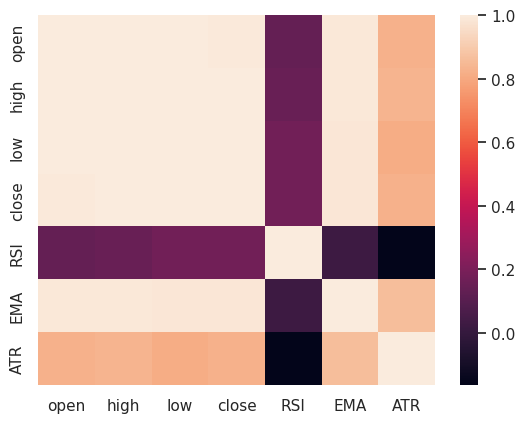

In [55]:
corr_matrix = final_data.drop('datetime', axis=1).corr()
sns.heatmap(corr_matrix)
plt.show

- We can check the values to have antother point of view 

In [56]:
corr_matrix['close']


open     0.994927
high     0.997539
low      0.997530
close    1.000000
RSI      0.173826
EMA      0.985783
ATR      0.825791
Name: close, dtype: float64

- It seems that the Close Price is relativelly high correlated with the EMA and ATR indicators, we can add them to the Regressos 
#### Apply multiple Linear Rgression

In [57]:
regressor = ['close', 'ATR', 'EMA']
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

In [58]:
regression_matrix, future_price, mult_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

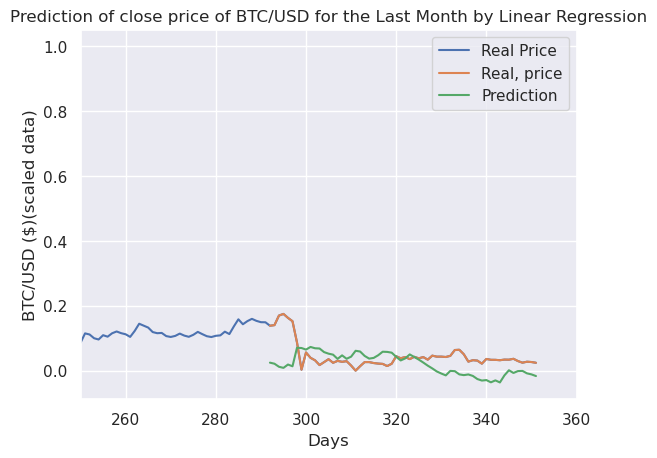

In [59]:
visualize_model(regression_matrix, scaled_data, zoom=[250, 360])

- We can compare the $R^{2}$ of the two methods 
- Likewise, we see above that the multiple linear regression cannot predict properly the continuity of the price jsute befor day 300. Moreover the prediction diverges between $[\, 300, 340\,]$

In [60]:
mult_r2, simple_r2

(0.6022066349752078, 0.5301132142754481)

- The $R^{2}_{mult} > R^{2}_{simple}$, but the prediction is not better, $R^{2}$ increses just beacuse we have added regressors
- We can also plot the prediction of the first two months of 2023

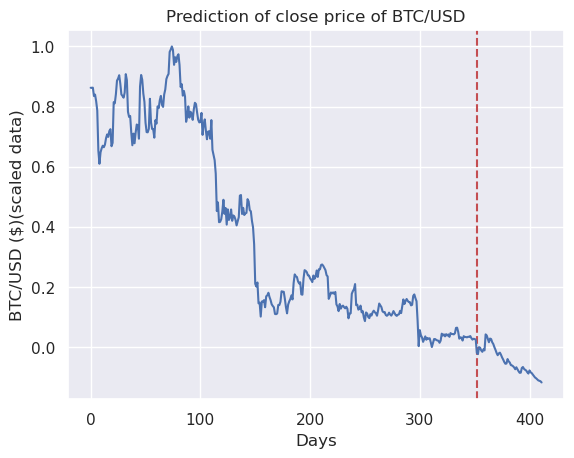

In [61]:
visualize_future(scaled_data, future_price)

- We notice that the two predictions of the models are different and the multimple linear regression gives negative close price which is a problem in our case beacause we use the $\texttt{MinMaxScaler}$
#### Conclusion : 
The linear regression ase we expected is not adapted to this kind of prediction, time series are more challenging to predict so in the next part we will try another type of regression more sophisticated 

## Second Model : Suport Vector Regression 
- We apply the SVR mathod with function $\texttt{apply\_svr}$

In [24]:
svr_matrix, future_price, accuracy_score = apply_svr(scaled_data, prediction_time, price, target, regressor)

- We can visualize the prediction between $[\, 280, 350\, ]$ days 

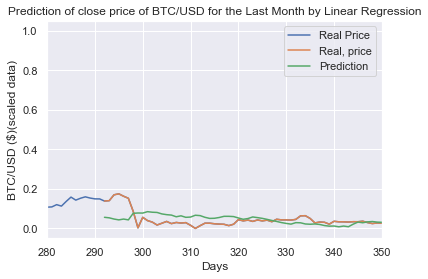

In [25]:
visualize_model(svr_matrix, scaled_data, zoom = [280, 350])

- Visually it seems that the SVR model fit better than the Linear Regression but it's far from what we want, peaks and drops are not dredicted, for example beteween $[\, 290, 300\, ]$ the drop is predicted earlier.
- We can cehck the accuracy score 

In [26]:
accuracy_score

0.5802672405026824

- This value means that $57 \%$ of the test data where correctly predicted 
We can also show the prediction for the two first months of 2023

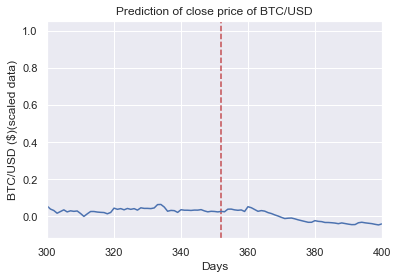

In [27]:
visualize_future(scaled_data, future_price, zoom=[300, 400])

- The prediction seems to be not highly volatile and diverges to negative value taht we do not accept

#### Conclusion : 
The three methods that we have presented give prediction that cannot be adapted to financial time series. We have to go in depth in specific learning models for time series especially methods with deep learning. 


In [28]:
symbol = 'BTC/USD'
interval = '1h'
start_date = '2022-01-01 00:00:00'
end_date = '2023-03-31 00:00:00'

In [29]:
# We define the sequence length
sequence_length = 10 

In [30]:
hour_data = load_data(symbol, start_date, end_date, interval)



In [31]:
hour_data = scaling_data(hour_data)
hour_data

,datetime,open,high,low,close
0,2022-09-02 00:00:00,0.337877,0.326984,0.347354,0.332990
1,2022-09-02 01:00:00,0.333766,0.323306,0.344560,0.330806
2,2022-09-02 02:00:00,0.331486,0.322596,0.340401,0.329661
3,2022-09-02 03:00:00,0.330348,0.334123,0.345551,0.339423
4,2022-09-02 04:00:00,0.339948,0.337763,0.354475,0.339866
...,...,...,...,...,...
4995,2023-03-30 20:00:00,0.925215,0.925599,0.948001,0.936405
4996,2023-03-30 21:00:00,0.939245,0.926987,0.956915,0.932410
4997,2023-03-30 22:00:00,0.933925,0.923930,0.942779,0.917745
4998,2023-03-30 23:00:00,0.921327,0.916780,0.943350,0.926987


In [32]:
def LSTM_inputs(scaled_data, window_size):
    arr = scaled_data['close'].to_numpy()
    X = []
    Y = []
    for i in range(len(arr) - window_size):
        X.append(arr[i:i + window_size])
        Y.append(arr[i+window_size])
    X = np.array(X)
    price = X.reshape((X.shape[0], X.shape[1], 1))
    label = np.array(Y)
    return price, label 

    


In [33]:
price, label = LSTM_inputs(hour_data, 5)
price


array([[[0.33298954],
        [0.33080631],
        [0.32966144],
        [0.33942256],
        [0.33986556]],

       [[0.33080631],
        [0.32966144],
        [0.33942256],
        [0.33986556],
        [0.33684702]],

       [[0.32966144],
        [0.33942256],
        [0.33986556],
        [0.33684702],
        [0.33547243]],

       ...,

       [[0.91324863],
        [0.9168742 ],
        [0.92249872],
        [0.93640517],
        [0.93240974]],

       [[0.9168742 ],
        [0.92249872],
        [0.93640517],
        [0.93240974],
        [0.91774534]],

       [[0.92249872],
        [0.93640517],
        [0.93240974],
        [0.91774534],
        [0.92698727]]])

In [34]:
price_train, price_test, label_tarin, label_test = train_test_split(price, label, test_size = 0.3)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [36]:
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss = MeanSquaredError(), optimizer= Adam(learning_rate= 1e4), metrics=[RootMeanSquaredError()])


In [39]:
model.fit(price_train, label_tarin, validation_data=(price_test, label_test), epochs=10, callbacks=[cp])

Epoch 1/10
103/110 [===========================>..] - ETA: 0s - loss: 126202606061092864.0000 - root_mean_squared_error: 355250048.0000INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 11s 67ms/step - loss: 118982774626451456.0000 - root_mean_squared_error: 344938784.0000 - val_loss: 2388986880.0000 - val_root_mean_squared_error: 48877.2617
Epoch 2/10
103/110 [===========================>..] - ETA: 0s - loss: 2380711680.0000 - root_mean_squared_error: 48792.5391INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 7s 62ms/step - loss: 2380133632.0000 - root_mean_squared_error: 48786.6133 - val_loss: 2369712384.0000 - val_root_mean_squared_error: 48679.6914
Epoch 3/10
103/110 [===========================>..] - ETA: 0s - loss: 2358345472.0000 - root_mean_squared_error: 48562.8008INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 5s 48ms/step - loss: 2357596416.0000 - root_mean_squared_error: 48555.0859 - val_loss: 2344135936.0000 - val_root_mean_squared_error: 48416.2773
Epoch 4/10
106/110 [===========================>..] - ETA: 0s - loss: 2329858560.0000 - root_mean_squared_error: 48268.6094INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 8s 70ms/step - loss: 2329392384.0000 - root_mean_squared_error: 48263.7773 - val_loss: 2313336320.0000 - val_root_mean_squared_error: 48097.1562
Epoch 5/10
105/110 [===========================>..] - ETA: 0s - loss: 2296957696.0000 - root_mean_squared_error: 47926.5859INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 7s 66ms/step - loss: 2296259840.0000 - root_mean_squared_error: 47919.3047 - val_loss: 2277871360.0000 - val_root_mean_squared_error: 47727.0508
Epoch 6/10
109/110 [============================>.] - ETA: 0s - loss: 2258704896.0000 - root_mean_squared_error: 47525.8359INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 5s 49ms/step - loss: 2258658560.0000 - root_mean_squared_error: 47525.3477 - val_loss: 2238122752.0000 - val_root_mean_squared_error: 47308.8008
Epoch 7/10
105/110 [===========================>..] - ETA: 0s - loss: 2217784064.0000 - root_mean_squared_error: 47093.3555INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 7s 60ms/step - loss: 2216928256.0000 - root_mean_squared_error: 47084.2695 - val_loss: 2194394880.0000 - val_root_mean_squared_error: 46844.3672
Epoch 8/10
110/110 [==============================] - ETA: 0s - loss: 2171344640.0000 - root_mean_squared_error: 46597.6875INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 7s 64ms/step - loss: 2171344640.0000 - root_mean_squared_error: 46597.6875 - val_loss: 2146934912.0000 - val_root_mean_squared_error: 46335.0273
Epoch 9/10
105/110 [===========================>..] - ETA: 0s - loss: 2123138688.0000 - root_mean_squared_error: 46077.5273INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 7s 68ms/step - loss: 2122144256.0000 - root_mean_squared_error: 46066.7383 - val_loss: 2095972992.0000 - val_root_mean_squared_error: 45781.7969
Epoch 10/10
108/110 [============================>.] - ETA: 0s - loss: 2069857152.0000 - root_mean_squared_error: 45495.6836INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 7s 64ms/step - loss: 2069545728.0000 - root_mean_squared_error: 45492.2617 - val_loss: 2041721728.0000 - val_root_mean_squared_error: 45185.4141


In [40]:
from tensorflow.keras.models import load_model

In [41]:
model = load_model('model/')

In [42]:
train_prediction = model.predict(price_train)

110/110 [==============================] - 1s 4ms/step


In [43]:
train_prediction

array([[-45185.06],
       [-45185.06],
       [-45185.06],
       ...,
       [-45185.06],
       [-45185.06],
       [-45185.06]], dtype=float32)

#### RNN Model (AZIZ)

In [62]:
# We define the sequence length 
sequence_length = 10 

In [63]:
# We create sequences for training
X, y = create_sequences(scaled_data, sequence_length)

In [64]:
# We split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [65]:
# We define the RNN model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)), # LSTM layer with 50 units and return sequences
    Dropout(0.2), # Dropout layer to prevent overfitting
    LSTM(50, return_sequences=False), 
    Dropout(0.2),
    Dense(25), 
    Dense(1) 
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # Use Adam optimizer and mean squared error loss to optimize the prediction

In [66]:
# We train the model
model.fit(X_train, y_train, batch_size=351, epochs=200) # Train for 200 epochs (= How many times the entire dataset is used for training) with a batch size (=How many data samples are processed at a time during an epoch) of 351

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.3032
Epoch 2/200
1/1 [==============================] - 0s 57ms/step - loss: 0.2424
Epoch 3/200
1/1 [==============================] - 0s 51ms/step - loss: 0.1886
Epoch 4/200
1/1 [==============================] - 0s 49ms/step - loss: 0.1380
Epoch 5/200
1/1 [==============================] - 0s 53ms/step - loss: 0.0857
Epoch 6/200
1/1 [==============================] - 0s 49ms/step - loss: 0.0526
Epoch 7/200
1/1 [==============================] - 0s 50ms/step - loss: 0.0276
Epoch 8/200
1/1 [==============================] - 0s 50ms/step - loss: 0.0168
Epoch 9/200
1/1 [==============================] - 0s 52ms/step - loss: 0.0260
Epoch 10/200
1/1 [==============================] - 0s 48ms/step - loss: 0.0433
Epoch 11/200
1/1 [==============================] - 0s 46ms/step - loss: 0.0562
Epoch 12/200
1/1 [==============================] - 0s 39ms/step - loss: 0.0505
Epoch 13/200
1/1 [==============================] -

In [67]:
# We make predictions
predicted_values= model.predict(X_test)

4/4 [==============================] - 1s 11ms/step


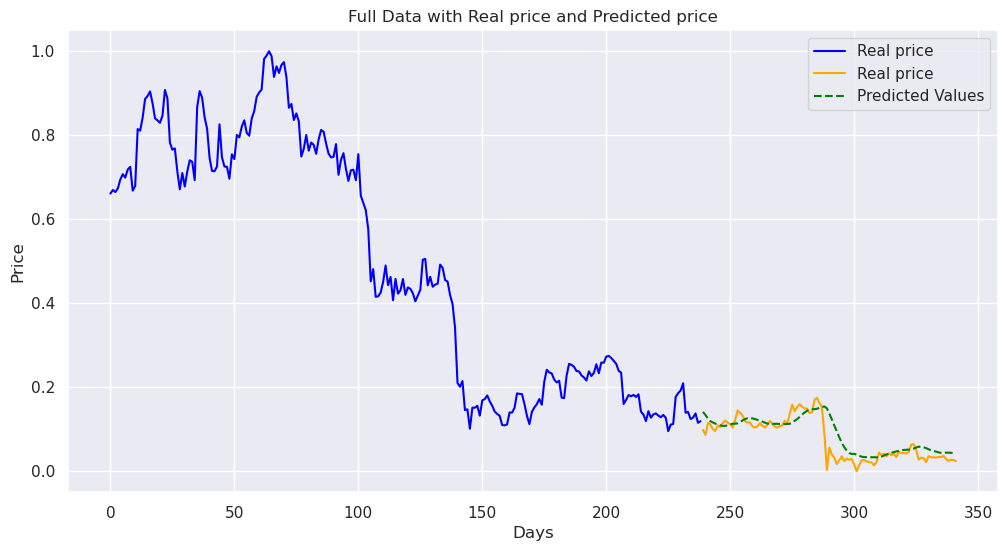

In [68]:
# We visualize real and predicted prices
visualize_RNN_prediction(y_train, y_test,predicted_values)